Risk_Factors.xlsx contains monthly observations of the risk-free rate and the three Fama–French risk factors (expressed as percentages, but without "%"), over the ten-year period from Jan 2004 through Dec 2013.

Regress the monthly excess returns for each industry portfolio on the three Fama–French risk factors:

    Create a table showing the factor loadings on SMB and HML for the ten industry portfolios.

Using excess returns for the ten industry portfolios, calculate the following performance metrics:

1. Sharpe ratio
2. Sortino ratio (using risk-free rate as target)
3. Treynor ratio (using CAPM β)
4. Jensen's α
5. Three-factor α

where Ri is return on industry portfolio and Rf is risk-free rate.

6. Create a table showing the performance metrics for the ten industry portfolios.

7. Plot your results as a bar chart for each performance metric.

8. Briefly explain the economic significance of each of the three performance ratios (but not α's).

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot, scatter, plot, axis
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# Datetime
import datetime as dt
from datetime import datetime
from datetime import timedelta

import warnings
warnings.filterwarnings("ignore")

In [2]:
Industry_Portfolio=pd.read_excel("Industry_Portfolios.xlsx",index_col=0)

In [3]:
Market_Portfolio=pd.read_excel("Market_Portfolio.xlsx",index_col=0)

In [4]:
Risk_Factors=pd.read_excel("Risk_Factors.xlsx",index_col=0)

In [5]:
Industry_Portfolio

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86
...,...,...,...,...,...,...,...,...,...,...
201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87


In [6]:
Market_Portfolio

,Market
Date,
200401,2.22
200402,1.46
200403,-1.23
200404,-1.75
200405,1.23
...,...
201308,-2.69
201309,3.76
201310,4.17


In [7]:
Risk_Factors

,Rf,Rm-Rf,SMB,HML
Date,,,,
200401,0.07,2.15,2.67,1.55
200402,0.06,1.40,-1.17,0.45
200403,0.09,-1.32,1.84,0.07
200404,0.08,-1.83,-2.59,-1.67
200405,0.06,1.17,-0.10,-0.33
...,...,...,...,...
201308,0.00,-2.69,0.29,-2.46
201309,0.00,3.76,2.85,-1.59
201310,0.00,4.17,-1.56,1.31


In [8]:
# Deduct risk free rate from Industry_Portfolio

for i in Industry_Portfolio.columns:
    Industry_Portfolio[str(i)] = Industry_Portfolio[i].subtract(Risk_Factors["Rf"], fill_value=0)

In [9]:
Industry_Portfolio

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,-0.01,-1.14,-0.69,0.37,4.46,1.34,0.38,3.02,1.85,2.81
200402,4.19,-0.13,1.89,4.63,-2.98,-0.58,6.03,0.83,2.01,2.10
200403,-0.18,-1.24,-0.36,-0.22,-2.64,-2.16,0.20,-4.05,1.04,-0.72
200404,1.34,2.22,-0.25,2.44,-4.99,-0.56,-2.78,3.46,-3.63,-3.84
200405,-1.95,-1.70,1.55,0.33,4.79,-3.01,0.24,-0.48,1.22,1.80
...,...,...,...,...,...,...,...,...,...,...
201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87


In [10]:
# Merge the excess return dataframe and the risk factors dataframe together

Merged_Portfolio = Industry_Portfolio.merge(Risk_Factors,how='inner',left_index=True, right_index=True)

In [11]:
Merged_Portfolio

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,Rf,Rm-Rf,SMB,HML
Date,,,,,,,,,,,,,,
200401,-0.01,-1.14,-0.69,0.37,4.46,1.34,0.38,3.02,1.85,2.81,0.07,2.15,2.67,1.55
200402,4.19,-0.13,1.89,4.63,-2.98,-0.58,6.03,0.83,2.01,2.10,0.06,1.40,-1.17,0.45
200403,-0.18,-1.24,-0.36,-0.22,-2.64,-2.16,0.20,-4.05,1.04,-0.72,0.09,-1.32,1.84,0.07
200404,1.34,2.22,-0.25,2.44,-4.99,-0.56,-2.78,3.46,-3.63,-3.84,0.08,-1.83,-2.59,-1.67
200405,-1.95,-1.70,1.55,0.33,4.79,-3.01,0.24,-0.48,1.22,1.80,0.06,1.17,-0.10,-0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66,0.00,-2.69,0.29,-2.46
201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83,0.00,3.76,2.85,-1.59
201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87,0.00,4.17,-1.56,1.31


In [12]:
# Can comment this out if not calculating downside beta

Merged_Portfolio["Rm-Rf_star"] = np.where(Merged_Portfolio["Rm-Rf"]<0, 1, 0)

In [13]:
Merged_Portfolio

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,Rf,Rm-Rf,SMB,HML,Rm-Rf_star
Date,,,,,,,,,,,,,,,
200401,-0.01,-1.14,-0.69,0.37,4.46,1.34,0.38,3.02,1.85,2.81,0.07,2.15,2.67,1.55,0
200402,4.19,-0.13,1.89,4.63,-2.98,-0.58,6.03,0.83,2.01,2.10,0.06,1.40,-1.17,0.45,0
200403,-0.18,-1.24,-0.36,-0.22,-2.64,-2.16,0.20,-4.05,1.04,-0.72,0.09,-1.32,1.84,0.07,1
200404,1.34,2.22,-0.25,2.44,-4.99,-0.56,-2.78,3.46,-3.63,-3.84,0.08,-1.83,-2.59,-1.67,1
200405,-1.95,-1.70,1.55,0.33,4.79,-3.01,0.24,-0.48,1.22,1.80,0.06,1.17,-0.10,-0.33,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66,0.00,-2.69,0.29,-2.46,1
201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83,0.00,3.76,2.85,-1.59,0
201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87,0.00,4.17,-1.56,1.31,0


In [14]:
# Can comment this out if not calculating downside beta

# Initialize the Market_downside_model DataFrame with appropriate indices and columns
Market_downside_model=pd.DataFrame(index=["Jensen Alpha","beta","beta_star"],
                          columns=Industry_Portfolio.columns)

# Loop through the first 10 columns of Merged_Portfolio (industry portfolios)
for column in range(Market_downside_model.shape[1]):
    y = Merged_Portfolio.iloc[:, column]                         # Dependent variable (industry portfolio excess return)
    x = Merged_Portfolio[["Rm-Rf", "Rm-Rf_star"]]                # Independent variables (Market excess return) # Check that it is "Rm-Rf"
    
    # Add a constant (intercept term) to the independent variables
    x = sm.add_constant(x)
    
    # Perform linear regression
    model = sm.OLS(y, x).fit()

    # Store the regression results in the Market_model DataFrame
    Market_downside_model.iloc[0, column] = model.params['const']  # Intercept
    Market_downside_model.iloc[1, column] = model.params['Rm-Rf']  # Market (Rm-Rf)
    Market_downside_model.iloc[2, column] = model.params['Rm-Rf_star']  # Market (Rm-Rf)

In [15]:
Market_downside_model = Market_downside_model.T

In [16]:
Market_downside_model["Downside_beta"] = Market_downside_model["beta"] + Market_downside_model["beta_star"]

In [17]:
Market_downside_model

,Jensen Alpha,beta,beta_star,Downside_beta
NoDur,0.010227,0.726718,0.856871,1.583589
Durbl,-1.469886,1.86292,2.507473,4.370392
Manuf,-0.306823,1.262791,1.113883,2.376674
Enrgy,0.821389,0.901198,-0.755361,0.145837
HiTec,0.457072,1.026608,-1.242067,-0.215458
Telcm,0.256254,0.889155,-0.147557,0.741598
Shops,0.327816,0.81861,-0.128054,0.690556
Hlth,0.202428,0.682902,0.082328,0.76523
Utils,0.513331,0.523448,-0.159241,0.364207
Other,-0.736573,1.27785,0.832021,2.109872


Lesson 4 Slide 8

Beta of "beta" on the upside and beta of "Downside_beta" on the downside. If beta_star is more than 0, then investor is more sensitive to downside risk. If beta star is positive, for an actively managed portfolio, it is indicative of positive market timing ability, as the active investor is able to reduce beta exposure when market goes down, and increase beta exposure when market goes up.

In [18]:
# Initialize the Market_model DataFrame with appropriate indices and columns
Market_model=pd.DataFrame(index=["Jensen Alpha","CAPM beta"],
                          columns=Industry_Portfolio.columns)

# Loop through the first 10 columns of Merged_Portfolio (industry portfolios)
for column in range(Market_model.shape[1]):
    y = Merged_Portfolio.iloc[:, column]           # Dependent variable (industry portfolio excess return)
    x = Merged_Portfolio[["Rm-Rf"]]                # Independent variables (Market excess return) # Check that it is "Rm-Rf"
    
    # Add a constant (intercept term) to the independent variables
    x = sm.add_constant(x)
    
    # Perform linear regression
    model = sm.OLS(y, x).fit()

    # Store the regression results in the Market_model DataFrame
    Market_model.iloc[0, column] = model.params['const']  # Intercept
    Market_model.iloc[1, column] = model.params['Rm-Rf']  # Market (Rm-Rf)

In [19]:
# Initialize the Fama_French_model DataFrame with appropriate indices and columns
Fama_French_model=pd.DataFrame(index=["Intercept","Market","SMB","HML"],                                        #UMD
                               columns=Industry_Portfolio.columns)

# Loop through the first 10 columns of Merged_Portfolio (industry portfolios)
for column in range(Fama_French_model.shape[1]):
    y = Merged_Portfolio.iloc[:, column]           # Dependent variable (industry portfolio)
    x = Merged_Portfolio[["Rm-Rf", "SMB", "HML"]]  # Independent variables (Market, SMB, HML)                   #UMD
    
    # Add a constant (intercept term) to the independent variables
    x = sm.add_constant(x)
    
    # Perform linear regression
    model = sm.OLS(y, x).fit()

    # Store the regression results in the Fama_French_model DataFrame
    Fama_French_model.iloc[0, column] = model.params['const']  # Intercept
    Fama_French_model.iloc[1, column] = model.params['Rm-Rf']  # Market (Rm-Rf)
    Fama_French_model.iloc[2, column] = model.params['SMB']    # SMB
    Fama_French_model.iloc[3, column] = model.params['HML']    # HML
    #Fama_French_model.iloc[4, column] = model.params['UMD']    # UMD

Lesson 4

Risk factor for size risk (SMB) is return on portfolio that is long on small-cap stocks and short on big-cap stocks

Risk factor for value risk (HML) is return on portfolio that is long on value stocks and short on growth stocks

Positive (or negative) coefficient for SMB means that portfolio behaves like a small cap (or big cap) stock

Positive (or negative) coefficient for HML means that portfolio behaves like value (or growth) stock

Risk factor for momentum effect (UMD) is return on portfolio that is long on past winners and short on past losers

In [20]:
Fama_French_model.T

,Intercept,Market,SMB,HML
NoDur,0.386704,0.712134,-0.229102,-0.023342
Durbl,-0.474342,1.447452,0.670878,0.240949
Manuf,0.153285,1.142282,0.087388,0.027727
Enrgy,0.523007,1.028354,-0.25936,-0.008158
HiTec,-0.065979,1.152803,0.335674,-0.556947
Telcm,0.200724,0.924137,-0.080299,-0.019063
Shops,0.255941,0.770227,0.280191,-0.03908
Hlth,0.257472,0.751976,-0.212655,-0.143765
Utils,0.474411,0.631827,-0.387961,-0.016881
Other,-0.404412,1.123473,-0.061676,0.547325


In [21]:
Sharpe_df=pd.DataFrame(index=["Sharpe"],
                       columns=Industry_Portfolio.columns)

for column in range(Sharpe_df.shape[1]):
    Risk_Premium = Industry_Portfolio.iloc[:, column].mean()          
    Standard_Deviation = Industry_Portfolio.iloc[:, column].std() 
    Sharpe_ratio=Risk_Premium/Standard_Deviation
    Sharpe_df.iloc[0,column]=Sharpe_ratio
    
# Note: If Information ratio target is rf then it is the same as Sharpe ratio

In [22]:
Sortino_df=pd.DataFrame(index=["Sortino"],
                        columns=Industry_Portfolio.columns)

for column in range(Sortino_df.shape[1]):
    # Calculate Risk Premium (mean return)
    Risk_Premium = Industry_Portfolio.iloc[:, column].mean() 
    
    # Calculate downside risk
    Returns = Industry_Portfolio.iloc[:, column]  # Extract the returns for the column
    downside_risk = np.where(Returns < 0, Returns ** 2, 0)  # Squared negative returns
    
    # Calculate Negative Standard Deviation (downside risk)
    Negative_Standard_Deviation = np.sqrt(np.mean(downside_risk))
    
    # Calculate Sortino Ratio
    if Negative_Standard_Deviation != 0:
        Sortino_ratio = Risk_Premium / Negative_Standard_Deviation     
    else:
        Sortino_ratio = None
    
    Sortino_df.iloc[0,column]=Sortino_ratio

In [23]:
Treynor_df=pd.DataFrame(index=["Treynor"],
                        columns=Industry_Portfolio.columns)

for column in range(Treynor_df.shape[1]):
    column_name=Treynor_df.columns[column]
    Risk_Premium = Industry_Portfolio.iloc[:, column].mean()          
    Beta=Market_model.loc["CAPM beta",column_name]
    Treynor_ratio=Risk_Premium/Beta
    Treynor_df.iloc[0,column]=Treynor_ratio

In [24]:
Jensen_Alpha_df=pd.DataFrame(index=["Jensen_Alpha"],
                             columns=Industry_Portfolio.columns)

Jensen_Alpha_df.iloc[0,:]=Market_model.loc["Jensen Alpha",:]

In [25]:
Fama_French_Alpha_df=pd.DataFrame(index=["Fama_French_Alpha"],
                                  columns=Industry_Portfolio.columns)

Fama_French_Alpha_df.iloc[0,:]=Fama_French_model.loc["Intercept",:]

In [26]:
Performance_Measures=pd.concat([Sharpe_df,
                                Sortino_df,
                                Treynor_df,
                                Jensen_Alpha_df,
                                Fama_French_Alpha_df])

Performance_Measures=Performance_Measures.T

In [27]:
Performance_Measures

,Sharpe,Sortino,Treynor,Jensen_Alpha,Fama_French_Alpha
NoDur,0.231099,0.350804,1.186372,0.369717,0.386704
Durbl,0.072356,0.111967,0.367463,-0.417903,-0.474342
Manuf,0.166616,0.24126,0.758251,0.160494,0.153285
Enrgy,0.181708,0.273612,1.14333,0.504485,0.523007
HiTec,0.118552,0.17062,0.564295,-0.064024,-0.065979
Telcm,0.169064,0.24494,0.836363,0.194348,0.200724
Shops,0.191753,0.293032,0.951258,0.274093,0.255941
Hlth,0.172529,0.270294,0.971435,0.236968,0.257472
Utils,0.210948,0.290044,1.452334,0.446523,0.474411
Other,0.064693,0.087351,0.299781,-0.387508,-0.404412


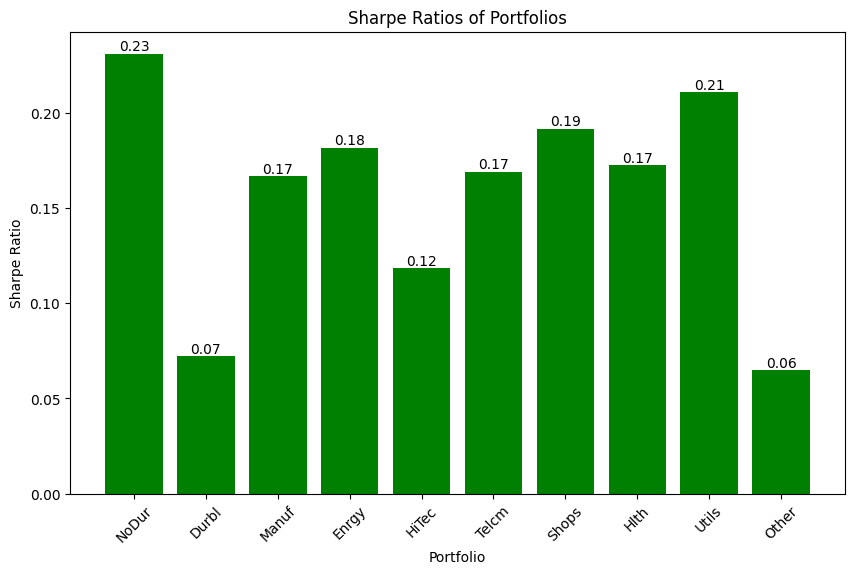

In [28]:
# Create a bar chart for the Sharpe ratios of each portfolio
plt.figure(figsize=(10,6))  
bars = plt.bar(Performance_Measures.index, Performance_Measures["Sharpe"], color='green')

plt.title("Sharpe Ratios of Portfolios")
plt.xlabel("Portfolio")
plt.ylabel("Sharpe Ratio")

# Add data labels
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xticks(rotation=45)  
plt.show()

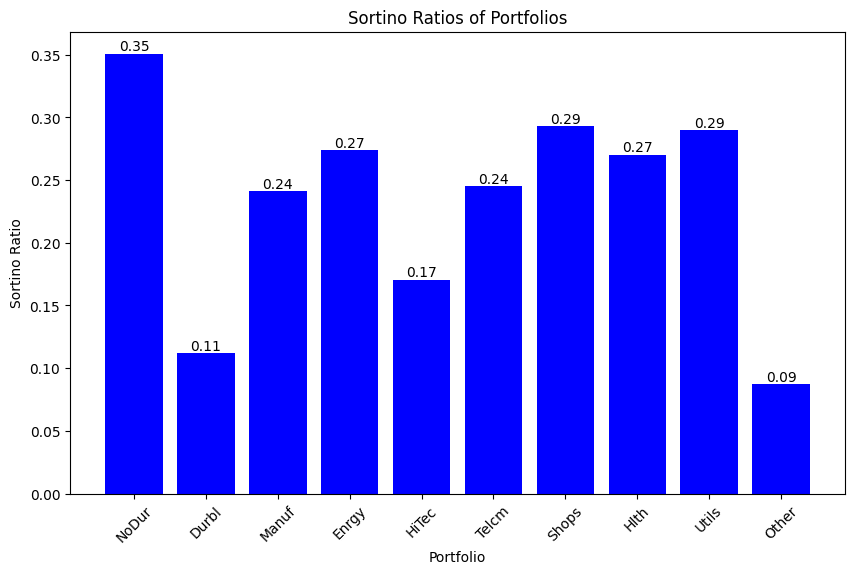

In [29]:
# Create a bar chart for the Sortino ratios of each portfolio
plt.figure(figsize=(10,6))  
bars = plt.bar(Performance_Measures.index, Performance_Measures["Sortino"], color='blue')

plt.title("Sortino Ratios of Portfolios")
plt.xlabel("Portfolio")
plt.ylabel("Sortino Ratio")

# Add data labels
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xticks(rotation=45)  
plt.show()

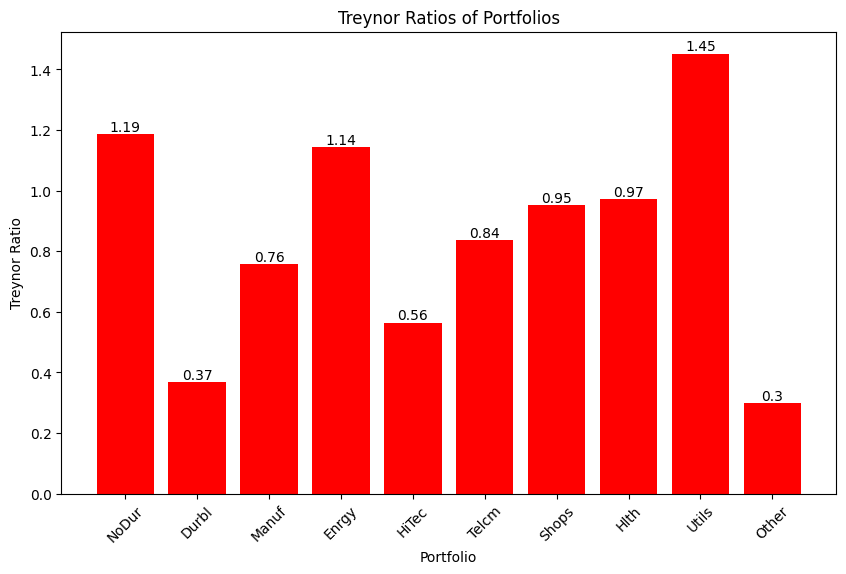

In [30]:
# Create a bar chart for the Treynor ratios of each portfolio
plt.figure(figsize=(10,6))  
bars = plt.bar(Performance_Measures.index, Performance_Measures["Treynor"], color='red')

plt.title("Treynor Ratios of Portfolios")
plt.xlabel("Portfolio")
plt.ylabel("Treynor Ratio")

# Add data labels
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xticks(rotation=45)  
plt.show()

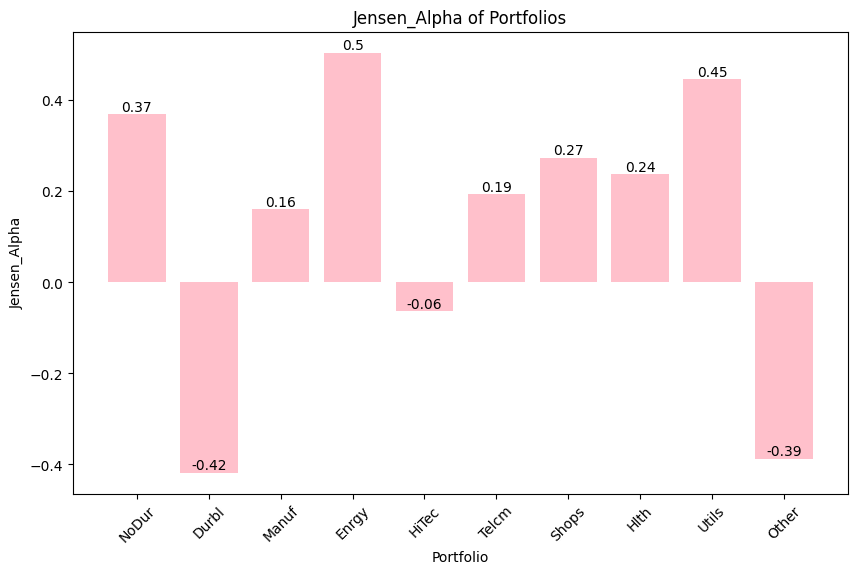

In [31]:
# Create a bar chart for the Jensen_Alpha of each portfolio
plt.figure(figsize=(10,6))  
bars = plt.bar(Performance_Measures.index, Performance_Measures["Jensen_Alpha"], color='pink')

plt.title("Jensen_Alpha of Portfolios")
plt.xlabel("Portfolio")
plt.ylabel("Jensen_Alpha")

# Add data labels
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xticks(rotation=45)  
plt.show()

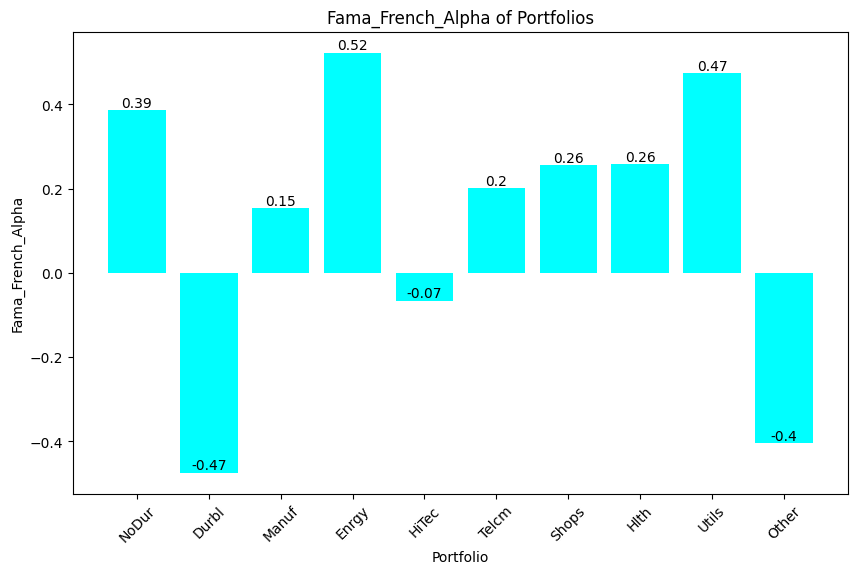

In [32]:
# Create a bar chart for the Fama_French_Alpha of each portfolio
plt.figure(figsize=(10,6))  
bars = plt.bar(Performance_Measures.index, Performance_Measures["Fama_French_Alpha"], color='cyan')

plt.title("Fama_French_Alpha of Portfolios")
plt.xlabel("Portfolio")
plt.ylabel("Fama_French_Alpha")

# Add data labels
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xticks(rotation=45)  
plt.show()

#### Economic significance and pricing implications of each of the three performance ratios 

The Sharpe ratio measures the risk premium per unit of standard deviation. Standard deviation captures total risk (both systematic and idiosyncatic risk), therefore Sharpe ratio is more appropriate for comparing well diversified portfolio with low/no idiosyncratic risk and less appropriate for comparing between individual investments and diversified portfolios. A drawback of using standard deviation as a measure of risk is that it assumes that returns are normally distributed, and thus is unable to distinguish between asymetric return distributions with the same variance but different skewness. When comparing 2 well-diversified portfolios, the portfolio with higher Sharpe ratio provides higher returns for every unit of volatility and is thus a more attractive portfolio.

Treynor ratio measures the risk premium per unit of market risk (beta). As beta only includes systematic (market) risk and ignores idiosyncratic risk, Treynor ratio can be used to compare the performance of individual investment to diversified portfolio. However, it does not take into account other types of systematic risk such as size or value, only considering market risk. A portfolio with higher Treynor ratio provides better risk premium for its exposure to market risk compared with a portfolio with lower Treynor ratio. All portfolios on the SML should have the same Treynor ratio.

Sortino ratio measures the portfolio's expected deviation from the benchmark return, per unit of below-target semi-deviation. Below-target semi-deviation only considers risk that realised return on investment falls below the target return. As below-target semi-variance is a measure of downside risk, Sortino ratio is able to distinguish between asymmetric distributions with same variance but different skewness. As investors are more sensitive to downside volatility compared with upside volatility, Sortino ratio maybe more informative compared to the Sharpe ratio, especially when the return distribution is not normal. Returns with the same variance but different skewness would have the same Sharpe Ratio but different Sortino ratio.

# Information Ratio

In [33]:
Industry_Portfolio=pd.read_excel("Industry_Portfolios.xlsx",index_col=0)

In [34]:
Market_Portfolio=pd.read_excel("Market_Portfolio.xlsx",index_col=0)

In [35]:
Industry_Portfolio

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86
...,...,...,...,...,...,...,...,...,...,...
201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87


In [36]:
Market_Portfolio

,Market
Date,
200401,2.22
200402,1.46
200403,-1.23
200404,-1.75
200405,1.23
...,...
201308,-2.69
201309,3.76
201310,4.17


In [37]:
# Deduct market portfolio from Industry_Portfolio

Deviation_from_target_df = pd.DataFrame(index = Industry_Portfolio.index,
                                        columns= Industry_Portfolio.columns)

for i in Industry_Portfolio.columns:
    Deviation_from_target_df[str(i)] = Industry_Portfolio[i].subtract(Market_Portfolio["Market"], fill_value=0)

In [38]:
Deviation_from_target_df

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,-2.16,-3.29,-2.84,-1.78,2.31,-0.81,-1.77,0.87,-0.30,0.66
200402,2.79,-1.53,0.49,3.23,-4.38,-1.98,4.63,-0.57,0.61,0.70
200403,1.14,0.08,0.96,1.10,-1.32,-0.84,1.52,-2.73,2.36,0.60
200404,3.17,4.05,1.58,4.27,-3.16,1.27,-0.95,5.29,-1.80,-2.01
200405,-3.12,-2.87,0.38,-0.84,3.62,-4.18,-0.93,-1.65,0.05,0.63
...,...,...,...,...,...,...,...,...,...,...
201308,-1.31,1.69,0.74,0.86,2.57,-0.59,-1.52,-0.80,-1.74,-0.97
201309,-1.82,2.70,1.44,-1.73,0.01,0.57,0.70,0.43,-2.71,0.07
201310,0.58,-3.45,0.39,0.69,-0.37,1.35,0.91,-0.70,-0.82,-0.30


In [39]:
Information_Ratio_df = pd.DataFrame({"Mean":Deviation_from_target_df.mean(),"Std":Deviation_from_target_df.std()})

In [40]:
Information_Ratio_df["Information Ratio"] = Information_Ratio_df["Mean"]/Information_Ratio_df["Std"]

In [41]:
Information_Ratio_df

,Mean,Std,Information Ratio
NoDur,0.154750,2.332316,0.066350
Durbl,-0.014750,5.160320,-0.002858
Manuf,0.264750,1.717702,0.154130
Enrgy,0.483083,4.390320,0.110034
HiTec,0.018167,2.258040,0.008045
Telcm,0.133333,2.163924,0.061616
Shops,0.168250,2.110125,0.079735
Hlth,0.035750,2.796506,0.012784
Utils,0.159083,3.502496,0.045420
Other,-0.259000,2.122075,-0.122050


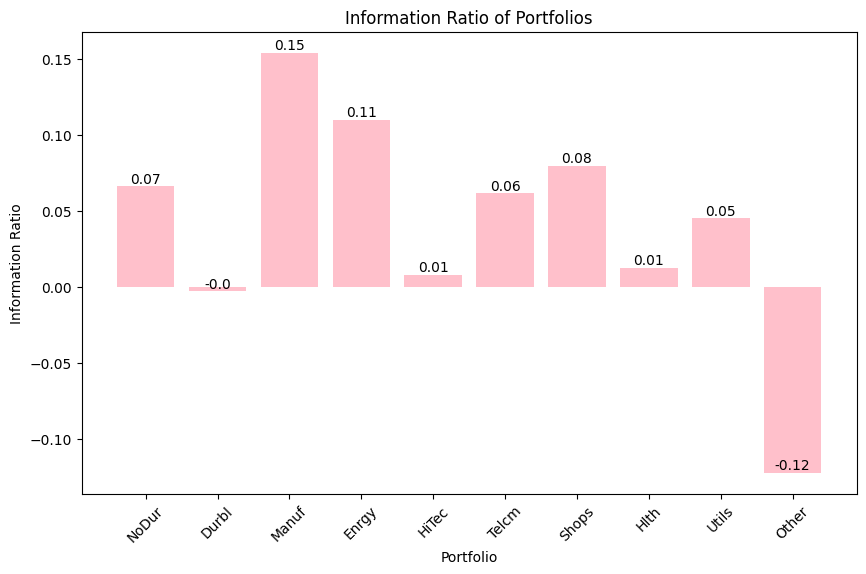

In [42]:
# Create a bar chart for the Information Ratio of each portfolio
plt.figure(figsize=(10,6))  
bars = plt.bar(Information_Ratio_df.index, Information_Ratio_df["Information Ratio"], color='pink')

plt.title("Information Ratio of Portfolios")
plt.xlabel("Portfolio")
plt.ylabel("Information Ratio")

# Add data labels
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xticks(rotation=45)  
plt.show()

Lesson 4 Slide 13

Information ratio is expected deviation from target (or benchmark) return, per unit of tracking error. It measures the ability of the fund manager to exceed target return, relative to the amount of tracking error. It is often used to evaluate fund managers who follow "enhanced indexing" strategy by overweighting or underweighting selected components of stock index. When comparing two fund managers, the manager with higher information ratio has the better ability to exceed target return for every unit of tracking error.